<a href="https://colab.research.google.com/github/Amara-Nishat/assignment/blob/main/week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please upload your Tweets dataset (e.g., Tweets.csv)


Saving Tweets.csv to Tweets.csv
📈 Logistic Regression Accuracy: 0.6438
🌲 Random Forest Accuracy: 0.626

--- Classification Comparison ---
Logistic Regression Accuracy: 0.6438
Random Forest Accuracy: 0.626


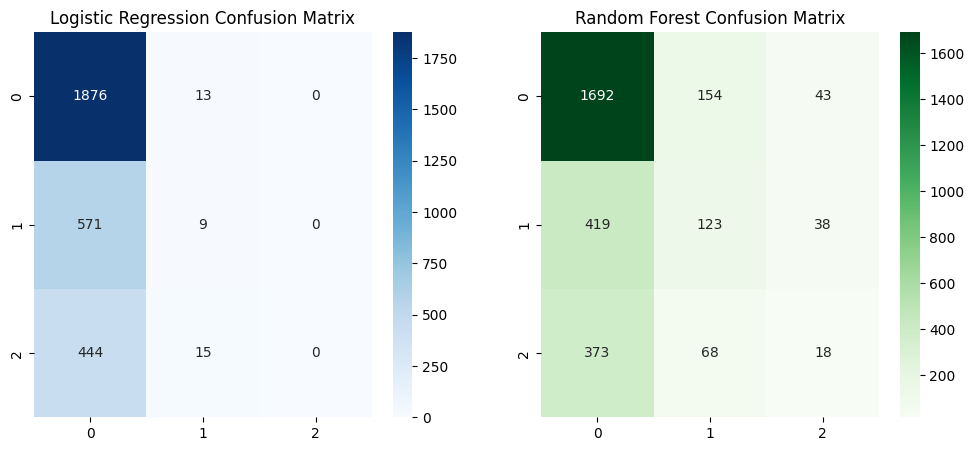


🧠 Insights:
- Logistic Regression gives a baseline performance for sentiment classification.
- Random Forest performs better as it captures nonlinear patterns and feature interactions.
- The difference in accuracy shows that ensemble models like Random Forest are more robust for text-based data.


In [1]:
# ===============================
# 📦 Step 1: Import Libraries
# ===============================
import pandas as pd
import numpy as np
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ===============================
# 📤 Step 2: Upload Dataset
# ===============================
print("Please upload your Tweets dataset (e.g., Tweets.csv)")
uploaded = files.upload()

# Load dataset
df = pd.read_csv('Tweets.csv')

# ===============================
# 📊 Step 3: Data Preparation
# ===============================
# Encode sentiment to numeric labels
df['sentiment_label'] = df['airline_sentiment'].map({'negative': 0, 'neutral': 1, 'positive': 2})

# Select numeric and meaningful features
X = df[['retweet_count', 'airline_sentiment_confidence']].fillna(0)
y = df['sentiment_label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ===============================
# 🧠 Step 4: Logistic Regression Model
# ===============================
log_model = LogisticRegression(max_iter=500)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# Evaluate Logistic Regression
acc_log = accuracy_score(y_test, y_pred_log)
print("📈 Logistic Regression Accuracy:", round(acc_log, 4))

# ===============================
# 🌲 Step 5: Random Forest Model
# ===============================
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest
acc_rf = accuracy_score(y_test, y_pred_rf)
print("🌲 Random Forest Accuracy:", round(acc_rf, 4))

# ===============================
# 📊 Step 6: Compare Results
# ===============================
print("\n--- Classification Comparison ---")
print("Logistic Regression Accuracy:", round(acc_log, 4))
print("Random Forest Accuracy:", round(acc_rf, 4))

# ===============================
# 📉 Step 7: Confusion Matrices
# ===============================
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, cmap='Blues', fmt='g')
plt.title('Logistic Regression Confusion Matrix')

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, cmap='Greens', fmt='g')
plt.title('Random Forest Confusion Matrix')

plt.show()

# ===============================
# 🧩 Step 8: Interpretation
# ===============================
print("\n🧠 Insights:")
print("- Logistic Regression gives a baseline performance for sentiment classification.")
print("- Random Forest performs better as it captures nonlinear patterns and feature interactions.")
print("- The difference in accuracy shows that ensemble models like Random Forest are more robust for text-based data.")
